---
comments: true
layout: post
title: Data Structure Writeup
courses: { csp: {week: 26} }
---

# Collections
Blog Python Model code and SQLite Database.

For this project, I have created a database called activities that stores the data for the locations and names of therapies. I have also added columns to the user database.

**From VSCode using SQLite3 Editor, show your unique collection/table in database, display rows and columns in the table of the SQLite database.**

Therapy SQLite Database:

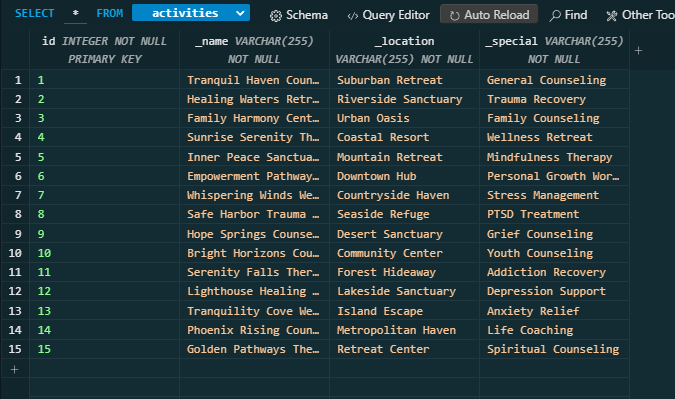

Therapy Database Code:

In [ ]:
""" database dependencies to support sqliteDB examples """
from random import randrange
from datetime import date
import os, base64
import json

from __init__ import app, db
from sqlalchemy.exc import IntegrityError
from werkzeug.security import generate_password_hash, check_password_hash


''' Tutorial: https://www.sqlalchemy.org/library.html#tutorials, try to get into Python shell and follow along '''

class Activity(db.Model):
    __tablename__ = 'activities'

    id = db.Column(db.Integer, primary_key=True)
    _name = db.Column(db.String(255), unique=False, nullable=False)
    _location = db.Column(db.String(255), unique=False, nullable=False)
    _special = db.Column(db.String(255), unique=False, nullable=False)

    def __init__(self, name, location, special):
        self._name = name
        self._location = location
        self._special = special

    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, name):
        self._name = name
    
    @property
    def location(self):
        return self._location
    
    @location.setter
    def location(self, location):
        self._location = location
    
    @property
    def special(self):
        return self._special
    
    @special.setter
    def special(self, special):
        self._special = special
    
    def __str__(self):
        return json.dumps(self.read())

    def create(self):
        try:
            db.session.add(self)
            db.session.commit()
            return self
        except IntegrityError:
            db.session.remove()
            return None

    def read(self):
        return {
            "id": self.id,
            "name": self.name,
            "location": self.location,
            "special": self.special,
        }

**From VSCode model, show your unique code that was created to initialize table and create test data.**

Therapy Initialization Code (Testing Data):

In [ ]:
def initActivities():
    with app.app_context():
        db.create_all()
        activities = [
            Activity(name="Tranquil Haven Counseling Center", location="Suburban Retreat", special="General Counseling"),
            Activity(name="Healing Waters Retreat", location="Riverside Sanctuary", special="Trauma Recovery"),
            Activity(name="Family Harmony Center", location="Urban Oasis", special="Family Counseling"),
            Activity(name="Sunrise Serenity Therapy Spa", location="Coastal Resort", special="Wellness Retreat"),
            Activity(name="Inner Peace Sanctuary", location="Mountain Retreat", special="Mindfulness Therapy"),
            Activity(name="Empowerment Pathways Center", location="Downtown Hub", special="Personal Growth Workshops"),
            Activity(name="Whispering Winds Wellness Retreat", location="Countryside Haven", special="Stress Management"),
            Activity(name="Safe Harbor Trauma Center", location="Seaside Refuge", special="PTSD Treatment"),
            Activity(name="Hope Springs Counseling Oasis", location="Desert Sanctuary", special="Grief Counseling"),
            Activity(name="Bright Horizons Counseling Collective", location="Community Center", special="Youth Counseling"),
            Activity(name="Serenity Falls Therapy Retreat", location="Forest Hideaway", special="Addiction Recovery"),
            Activity(name="Lighthouse Healing Institute", location="Lakeside Sanctuary", special="Depression Support"),
            Activity(name="Tranquility Cove Wellness Center", location="Island Escape", special="Anxiety Relief"),
            Activity(name="Phoenix Rising Counseling Center", location="Metropolitan Haven", special="Life Coaching"),
            Activity(name="Golden Pathways Therapy Haven", location="Retreat Center", special="Spiritual Counseling")
        ]
        for activity in activities:
            try:
                activity.create()
            except IntegrityError:
                db.session.rollback()
                print(f"Record exists")

# Lists and Dictionaries
Blog Python API code and use of List and Dictionaries.

**In VSCode using Debugger, show a list as extracted from database as Python objects.**

Activity Read List in Debugger:
![image.png](https://files.catbox.moe/krme19.png)
In the image above, you can see the list named activity that holds all the activities (ex. Activity 1, Activity 2, etc.)
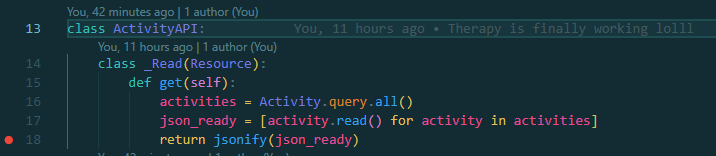
API code that fetches from the backend

**In VSCode use Debugger and list, show two distinct example examples of dictionaries, show Keys/Values using debugger.**

User Model Dictionary:
![image.png](https://files.catbox.moe/b2snoj.png)
Debugger demonstrating the dictionary<br>
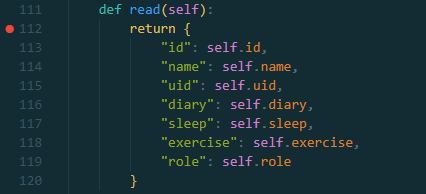
<br>Dictionary in code

Activity Model Dictionary:
![image.png](https://files.catbox.moe/2dojyy.png)
Debugger demonstrating dictionary<br>
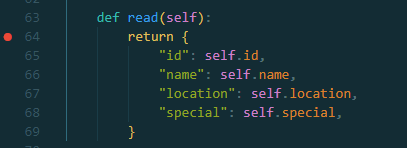
<br>Dictionary in code

# APIs and JSON
Blog Python API code and use of Postman to request and respond with JSON.

**In VSCode, show Python API code definition for request and response using GET, POST, UPDATE methods. Discuss algorithmic condition used to direct request to appropriate Python method based on request method.**

Within the two APIs, user_api and activity_api, there are resources that direct to the appropriate request methods. With the appropriate link, and with the right prefix, the right function will be called when a request is sent from the frontend.

Prefixes:

In [ ]:
user_api = Blueprint('user_api', __name__,
                   url_prefix='/api/users')

activity_api = Blueprint('activity_api', __name__,
                   url_prefix='/api/activity')

Endpoints:

In [ ]:
# Users_api endpoints
api.add_resource(_CRUD, '/')
api.add_resource(_Create, '/create')
api.add_resource(_Security, '/authenticate')
api.add_resource(_Diary, '/diary') # This is my endpoint in users
api.add_resource(_UD, '/<int:user_id>') 
api.add_resource(_Logout, '/logout') 

# Activity_api endpoints
api.add_resource(_Read, '/')
api.add_resource(_Create, '/create')

GET, POST, and PUT Code:

In [ ]:
# Get Code for Activities
class _Read(Resource):
    def get(self):
        activities = Activity.query.all()
        json_ready = [activity.read() for activity in activities]
        return jsonify(json_ready)
# Get Code for Diary
def get(self):
    token = request.cookies.get("jwt")
    data = jwt.decode(token, 
                    current_app.config["SECRET_KEY"], 
                    algorithms=["HS256"])
    users = User.query.all()
    for user in users:
        if user.uid == data["_uid"]:    
            jsonData = user.diary
            print(jsonData)
            return user.diary
        return jsonify(jsonData)
# Post Code
class _Create(Resource):
    def post(self):
        body = request.get_json()
        # Fetch data from the form
        name = body.get('name')
        if name is None or len(name) < 2:
            return {'message': f'Name is missing, or is less than 2 characters'}, 400
        # validate location
        location = body.get('location')
        if location is None or len(location) < 2:
            return {'message': f'Location is missing, or is less than 2 characters'}, 400
        # validate location
        special = body.get('special')
        if special is None or len(special) < 2:
            return {'message': f'Specialty is missing, or is less than 2 characters'}, 400
        new_activity = Activity(name=name, location=location, special=special)
        activity = new_activity.create()
        # success returns json of user
        if activity:
                #return jsonify(user.read())
                return activity.read()
            # failure returns error
        return {'message': f'Record already exists'}, 400
# Put Code
def put(self):
    body = request.get_json()
    token = request.cookies.get("jwt")
    data = jwt.decode(token, 
                    current_app.config["SECRET_KEY"], 
                    algorithms=["HS256"])
    diary = body.get('diary')
    users = User.query.all()
    for user in users:
        if user.uid == data["_uid"]:    
            print(data["_uid"])
            user.update("", "", "", user._diary + "///" + diary, "", "")
            return user.read()

**In VSCode, show algorithmic conditions used to validate data on a POST condition.**

Algorithmic Conditions to validate Post:

In [ ]:
name = body.get('name')
if name is None or len(name) < 2:
    return {'message': f'Name is missing, or is less than 2 characters'}, 400
# validate location
location = body.get('location')
if location is None or len(location) < 2:
    return {'message': f'Location is missing, or is less than 2 characters'}, 400
# validate location
special = body.get('special')
if special is None or len(special) < 2:
    return {'message': f'Specialty is missing, or is less than 2 characters'}, 400

**In Postman, show URL request and Body requirements for GET, POST, and UPDATE methods.**

GET:
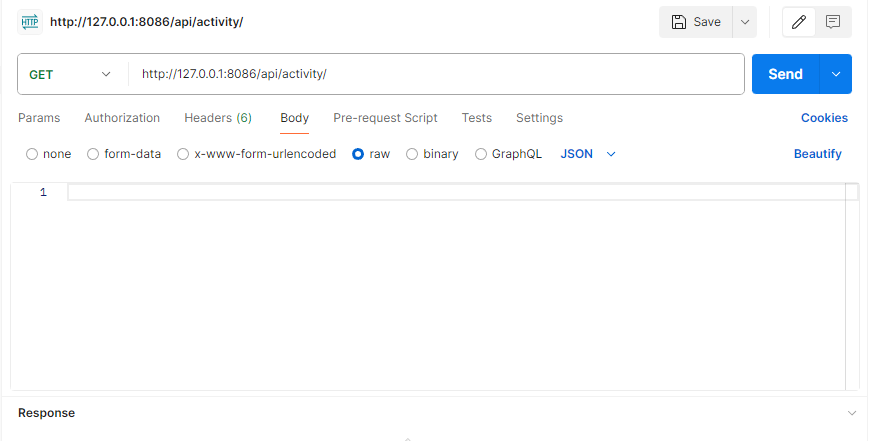
No body requirements for get as it only fetches data.

POST:
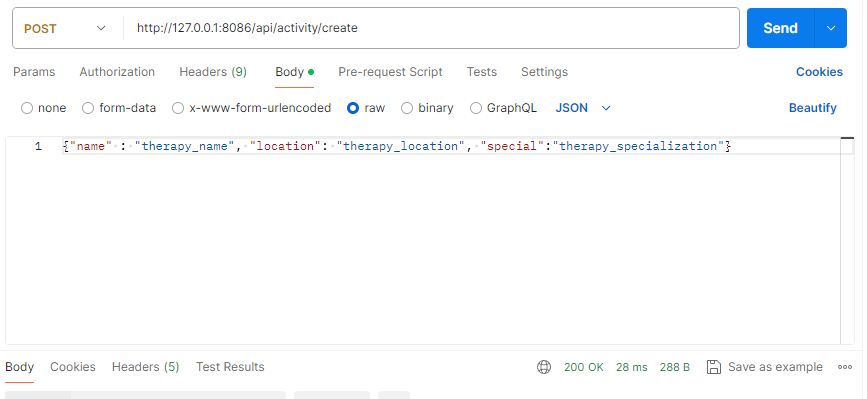
This post function requires the name, location, and specialization of the therapy.

PUT:
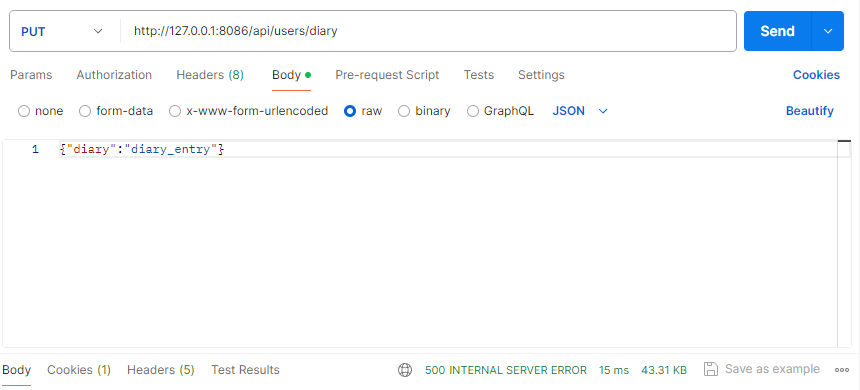
This put function only updates the diary column, and thus only requires diary.

**In Postman, show the JSON response data for 200 success conditions on GET, POST, and UPDATE methods.**

GET:
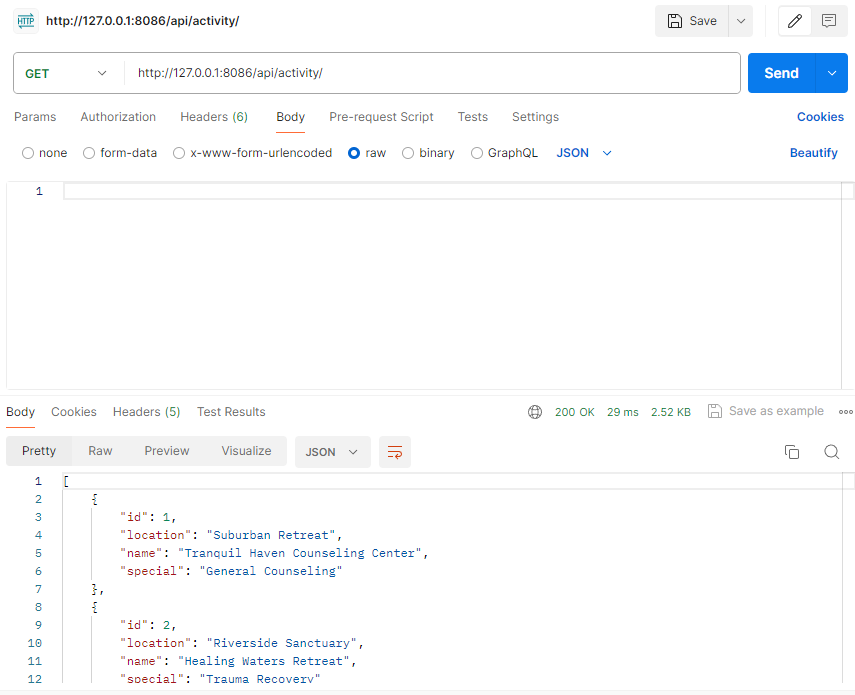
Successful GET request displays the data from the database for therapy.

POST:
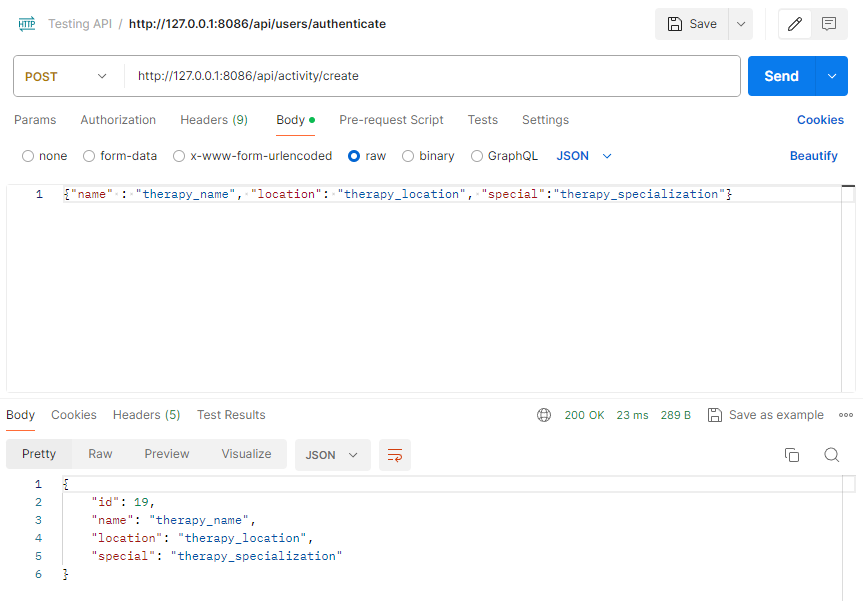
Successful POST displays the new therapy location added into the database. 

PUT:
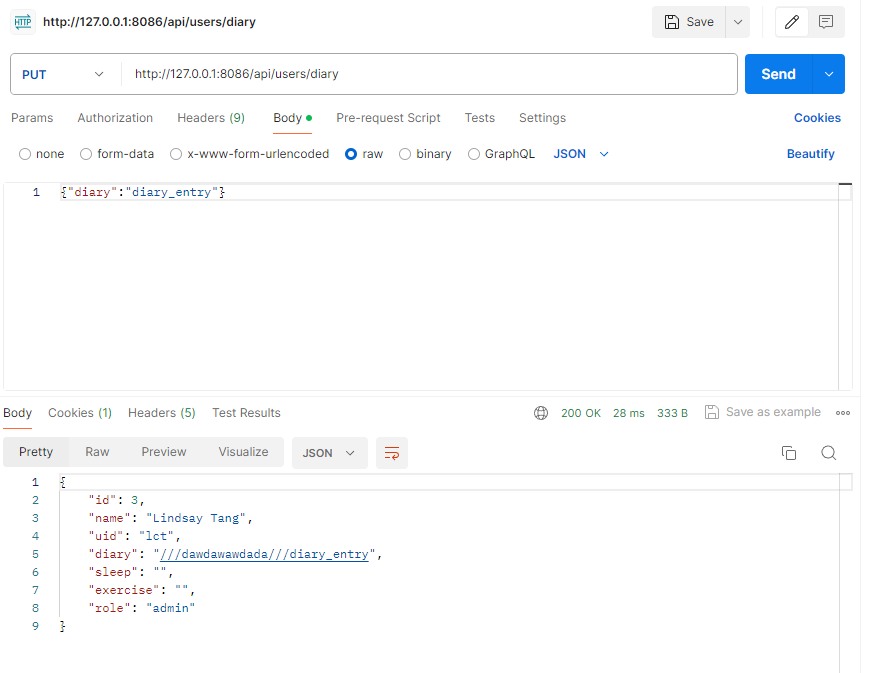
Successful PUT displays the data on the specific user with the updated diary (I had a previous diary entry of keyboard spam seperated by /// to signify a new diary entry).

**In Postman, show the JSON response for error for 400 when missing body on a POST request.**

Missing Body POST:
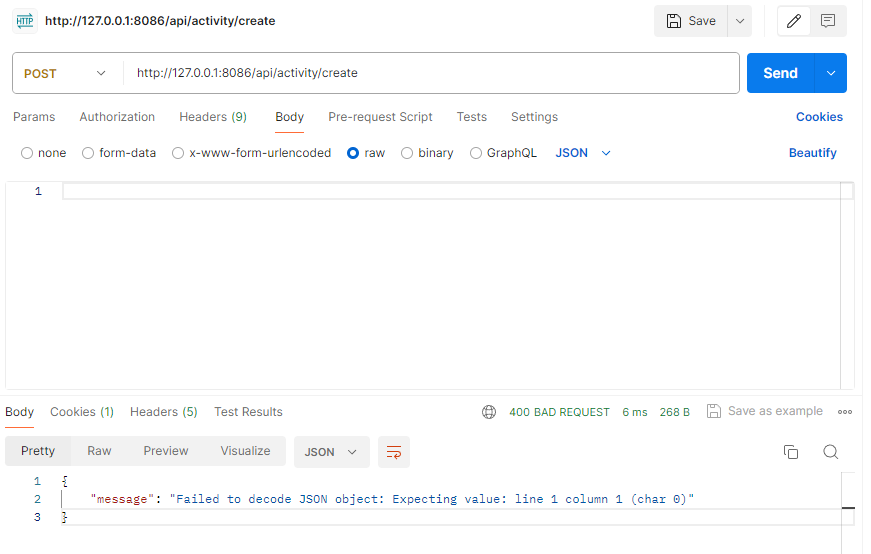
Does not allow me to create a new entry into the database

**In Postman, show the JSON response for error for 404 when providing an unknown user ID to a UPDATE request.**

This can not be accomplished. In my code, I take the cookie from the user that is logged in and I decode the cookie in order to update the information for that user. Thus, I am not able to provide an unknown user ID to update.

In [ ]:
def put(self):
    body = request.get_json()
    token = request.cookies.get("jwt")
    data = jwt.decode(token, 
                    current_app.config["SECRET_KEY"], 
                    algorithms=["HS256"])
    diary = body.get('diary')
    users = User.query.all()
    for user in users:
        if user.uid == data["_uid"]:    
            print(data["_uid"])
            user.update("", "", "", user._diary + "///" + diary, "", "")
            return user.read()

# Frontend
Blog JavaScript API fetch code and formatting code to display JSON.

**In Chrome inspect, show response of JSON objects from fetch of GET, POST, and UPDATE methods.**

GET:
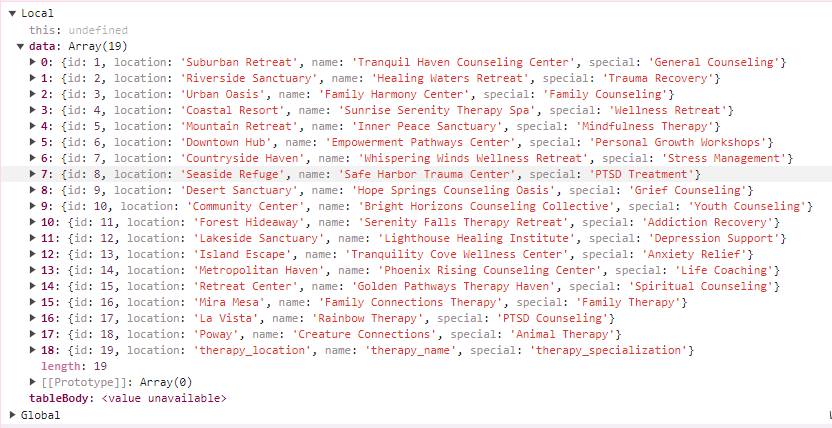
Fetching the therapy data from the backend JSON response in the frontend.

POST:
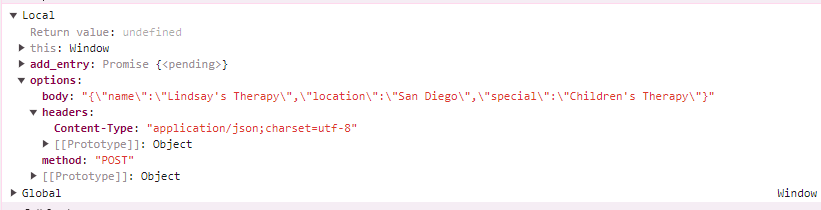
Sending data to the backend showing JSON response in the frontend.

PUT:
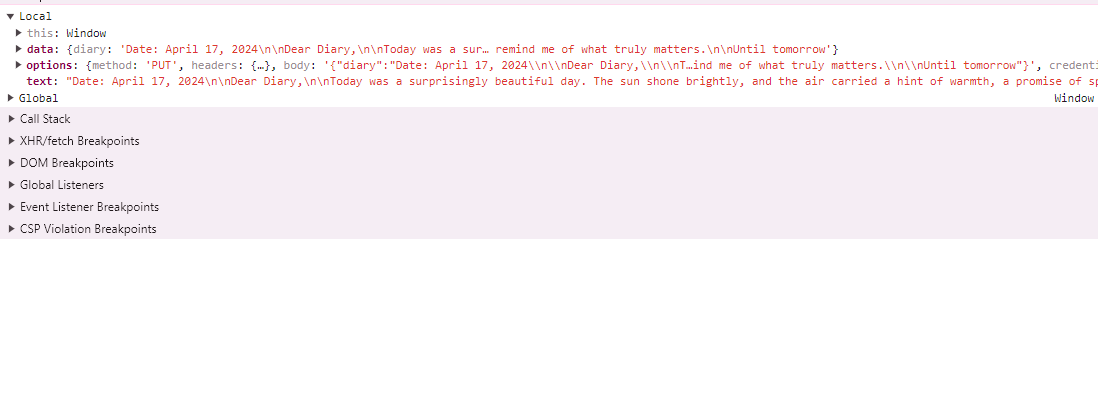
Sending data to the backend showing JSON response in the frontend.<br>

**In the Chrome browser, show a demo (GET) of obtaining an Array of JSON objects that are formatted into the browsers screen.**

GET fetching from activity database:
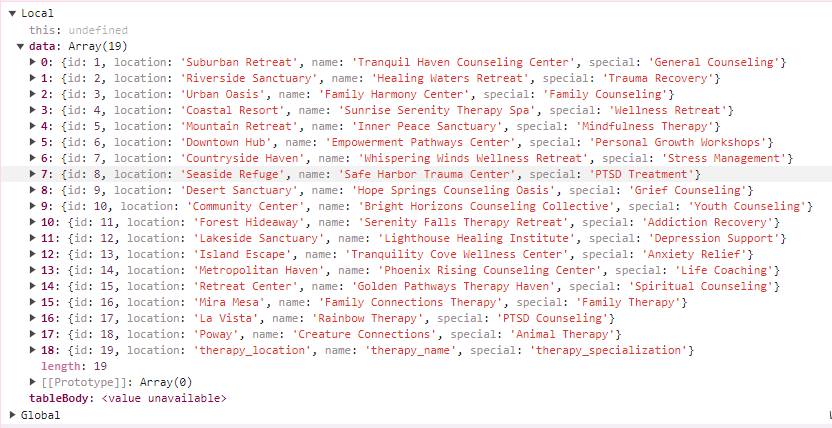
This is the array JSON response from the backend.

In JavaScript code, describe fetch and method that obtained the Array of JSON objects:
- GET request to backend to fetch the data
- Sent request to http://127.0.0.1:8086/api/activity/ which is the correct link
- if else catches if the response was okay or not okay

In [ ]:
function displayActivityTable() {
    let options = {
        method: 'GET',
        headers: {
            'Content-Type': 'application/json;charset=utf-8'
        },
    };
    fetch("http://127.0.0.1:8086/api/activity/", options)
    .then(response => {
        if (response.ok) {
            return response.json();
        } else {
            throw new Error('Network response was not ok.');
        }
    })

In JavaScript code, show code that performs iteration and formatting of data into HTML:
- Iterates through each entry in the database and displays it onto a table

In [ ]:
.then(data => {
    const tableBody = document.querySelector("#activity-table tbody");
    tableBody.innerHTML = ""; // Clear the existing table data
    data.forEach(activity => {
        const row = tableBody.insertRow();
        const nameCell = row.insertCell(0);
        const locationCell = row.insertCell(1);
        const specialCell = row.insertCell(2);

        nameCell.textContent = activity.name;
        locationCell.textContent = activity.location;
        specialCell.textContent = activity.special;
    });
})
.catch(error => {
    console.error('Error:', error);
    alert(error);
});
}

**In the Chrome browser, show a demo (POST or UPDATE) gathering and sending input and receiving a response that show update. Repeat this demo showing both success and failure.**

POST-

Success:
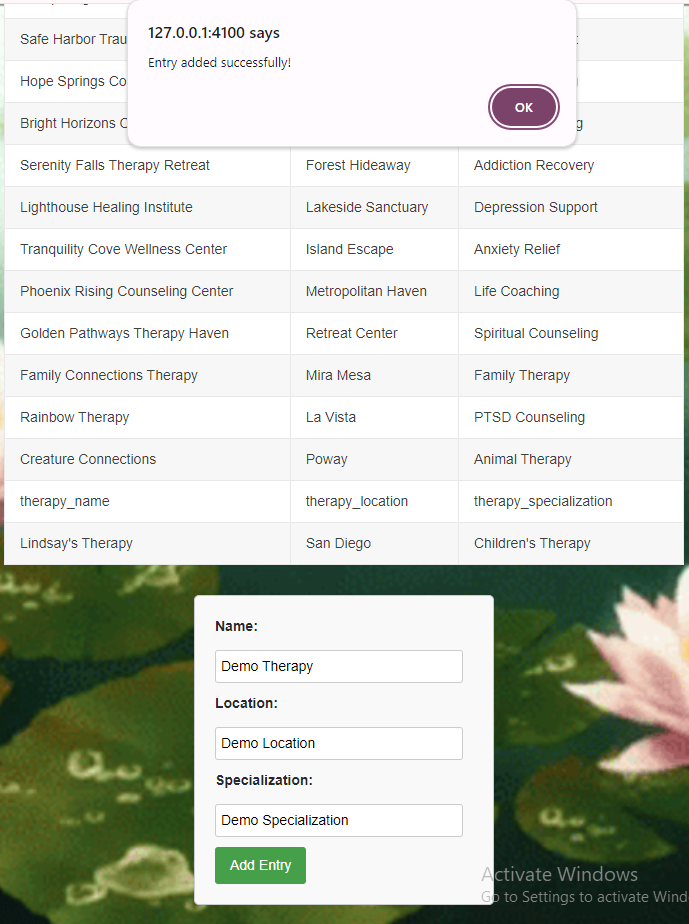
There is an alert message that pops up for the user to tell the user it was updated successfully. Once the message is clicked, the page reloads and the entry is displayed on the table
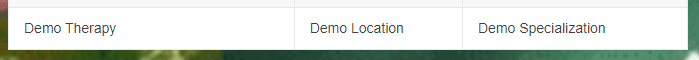

Failure:
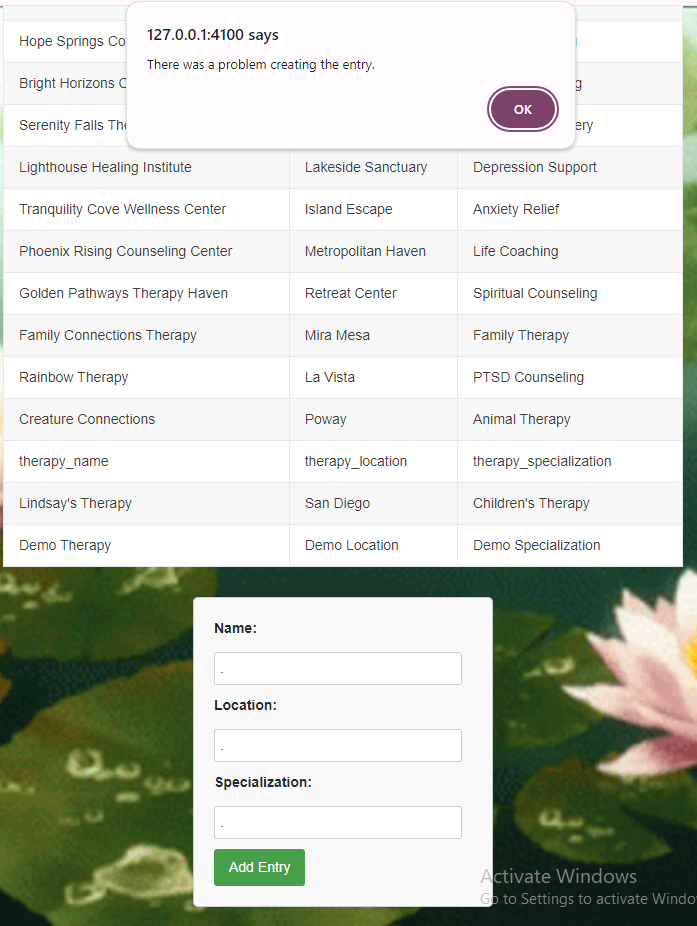
The length of the name, location, and specialization were too short so the entry could not be created.

In JavaScript code, show and describe code that handles success. Describe how code shows success to the user in the Chrome Browser screen:

In [ ]:
if (response.status === 200) {
    alert("Entry added successfully!");
    window.location.reload();

If the resopnse from the backend is 200, meaning that it was successful, the code will continue and run an alert message that displays to the user that the entry was added successfully, then the page and the table will reload (as the table regenerates when the page loads), and display the new entry.

In JavaScript code, show and describe code that handles failure. Describe how the code shows failure to the user in the Chrome Browser screen:

In [ ]:
else if (response.status === 400) {
    alert("There was a problem creating the entry.");
}

If the response given was 400 instead, this code will run giving an alert to the user that there was a problem creating the entry (so the user definitley knows there's a problem).